In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from subprocess import check_output
from datetime import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('F:\SIH\data.csv')

In [3]:
df.head()


,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [4]:
df.describe()


,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


<AxesSubplot:>

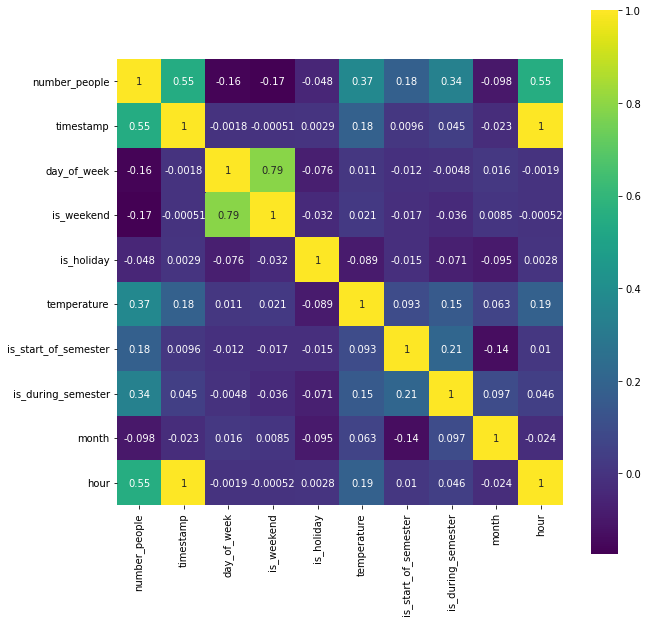

In [5]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

c:\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temperature', ylabel='Density'>

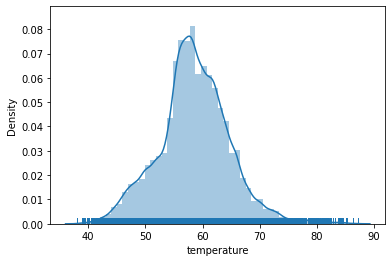

In [6]:
sns.distplot(df['temperature'], kde=True, rug=True)

c:\python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_people', ylabel='Density'>

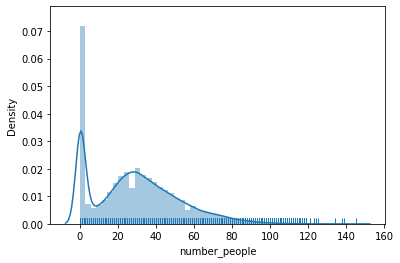

In [7]:
sns.distplot(df['number_people'], kde=True, rug=True)

In [8]:
def time_to_seconds(time):
    return time.hour * 3600 + time.minute * 60 + time.second

In [9]:
df = df.drop("date", axis=1)
noon = time_to_seconds(time(12, 0, 0))
df.timestamp = df.timestamp.apply(lambda t: abs(noon - t))
# one hot encoding
columns = ["day_of_week", "month", "hour"]
df = pd.get_dummies(df, columns=columns)
df.head()

,number_people,timestamp,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,day_of_week_0,day_of_week_1,day_of_week_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,37,18011,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,45,19214,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,40,19815,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,44,20416,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,21017,0,0,71.76,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [10]:
data = df.values
X = data[:, 1:]  # all rows, no label
y = data[:, 0]  # all rows, label only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
scaler1 = StandardScaler()
scaler1.fit(X_train[:, 0:1])
X_train[:, 0:1] = scaler1.transform(X_train[:, 0:1])
X_test[:, 0:1] = scaler1.transform(X_test[:, 0:1])
scaler2 = StandardScaler()
scaler2.fit(X_train[:, 3:4])
X_train[:, 3:4] = scaler2.transform(X_train[:, 3:4])
X_test[:, 3:4] = scaler2.transform(X_test[:, 3:4])

In [12]:
print(X_train)

[[ 0.96890919  1.          0.         ...  0.          0.
   0.        ]
 [-1.52764599  0.          0.         ...  0.          0.
   0.        ]
 [ 1.29762242  1.          0.         ...  0.          1.
   0.        ]
 ...
 [-0.89274174  1.          0.         ...  0.          0.
   0.        ]
 [ 0.91752049  1.          0.         ...  1.          0.
   0.        ]
 [ 0.02567272  0.          0.         ...  0.          0.
   0.        ]]


In [13]:
model = RandomForestRegressor(n_jobs=-1)

score =  0.9150237566443968
score =  0.9157244946520151
score =  0.9163270961900483
score =  0.9169444939930922
score =  0.9164794394667362
score =  0.9163976593001277


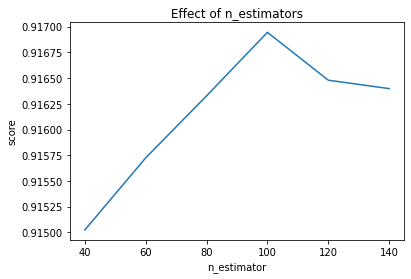

In [14]:
estimators = np.arange(40, 160, 20)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    print('score = ', model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [17]:
pip install pydot

You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [18]:
import pydot
# Pull out one tree from the forest
Tree = regressor.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

NameError: name 'regressor' is not defined